In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

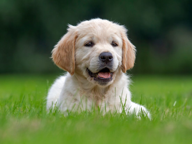

In [3]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [4]:
#|export
learn = load_learner('model.pkl')

In [5]:
learn.predict(im)

('False', TensorImage(0), TensorImage([9.9999e-01, 8.4529e-06]))

In [6]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [7]:
classify_image(im)

{'Dog': 0.9999915361404419, 'Cat': 8.452935617242474e-06}

In [12]:
#|export

image = gr.Image()
label = gr.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
